# HORÁRIO ESCOLAR UTILIZANDO ALGORITMO GENÉTICO

# Trabalho Prático 01

### Hércules Aparecido Teixeira¹, Luiza Borges Polita²

¹Instituto de Ciências Exatas e Aplicadas -- Universidade Federal de Ouro Preto (UFOP)  
Caixa Postal 24 –- 35.930-970 -- João Monlevade -- MG – Brasil

## Resumo

Trabalho realizado na disciplina de Inteligência Artificial que visa utilizar a implementação de algoritmos genéticos em Python para a criação de horários de aula.

## Introdução

A elaboração de horários escolares depende de várias restrições, como a disponibilidade de professores, a não coincidência de vários cursos de uma turma e a utilização adequada de salas de aula. Neste trabalho prático, vamos aplicar algoritmos genéticos para resolver o problema. Algoritmos genéticos são técnicas de busca inspiradas no processo de seleção natural. Uma população de soluções potenciais evolui através de gerações, através da seleção, do cruzamento e da mutação. Eles são especialmente úteis para problemas complexos multi-restrição complexos, como a elaboração de horários escolares. No trabalho prático, vamos basear na implementação fornecida pelo professor de um algoritmo genético em Python.

## Desenvolvimento

Para o desenvolvimento do algoritmo foi utilizado um exemplo fornecido pelo professor. Basicamente foi feita a adaptação e manipulação das variáveis para que o código pudesse corresponder ao problema de horários de aula. O código com todas as modificações pode ser encontrado no link: [Código Completo](https://github.com/Herculest619/IA_Algoritmo_Genetico/tree/main).

## Testes

Após o desenvolvimento do código para a criação dos horários de aulas, foram realizados testes para garantir os resultados da solução. As adaptações necessárias foram feitas, conforme os testes foram feitos para que os horários gerados atendam aos requisitos e funcionem corretamente.

### Dados utilizados

Para o teste utilizamos um conjunto de dados fictícios inicial que podem ser vistos, na tabela abaixo. Também utilizamos as seguintes constantes:

Observação: O algoritmo está calculando o horário de 1 dia, e a quantidade de turmas, horários, tamanho da população, podem ser alterados facilmente por variáveis globais.

```python
# Constantes e parâmetros do experimento
NUM_CLASSES = 3  # Número de turmas (1º Ano, 2º Ano, 3º Ano)
NUM_PERIODS = 5  # Número de horários por dia (1º Horário, 2º Horário, 3º Horário, 4º Horário)
POPULATION_SIZE = 10  # Tamanho da população de soluções
MIXING_NUMBER = 2  # Número de pais usados para cruzamento
MUTATION_RATE = 0.05  # Taxa de mutação

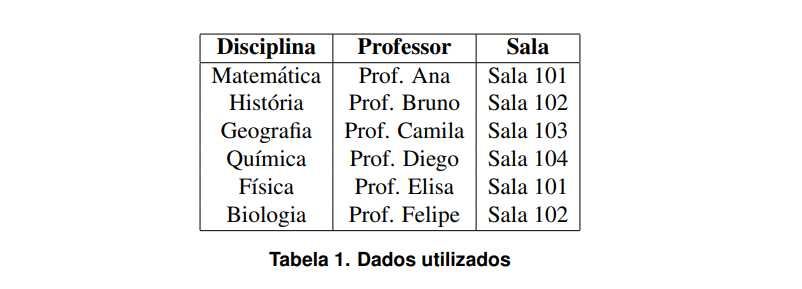

## Análise da Solução Encontrada
Após rodar o teste foi encontrado como uma das soluções os dados listados na tabela abaixo. Pode-se perceber que as restrições como horários e salas foram respeitadas, portanto o resultado foi positivo e de acordo com os dados inseridos no início. Com relação à qualidade dos horários, pode ser observado que mesmo não existindo conflito de horários existe uma sobrecarga no horário da Prof. Elisa, pois nessa solução ela precisa dar aula em 3 horários seguidos, o que poderia ser melhorado. Outro ponto seria que talvez não seja tão prático turmas diferentes compartilharem a mesma sala como acontece, por exemplo, com a Sala 104 que é compartilhada pelo primeiro e terceiro ano.

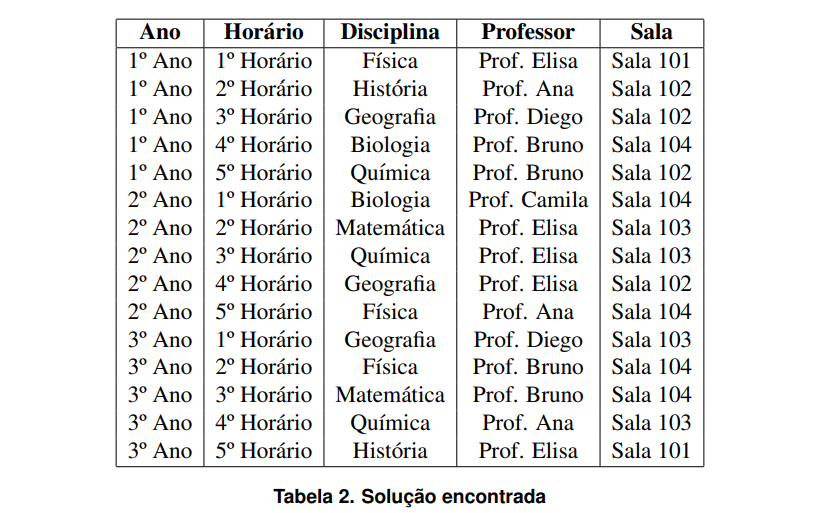

O retorno do código retorna uma lista de listas com o seguinte formato:

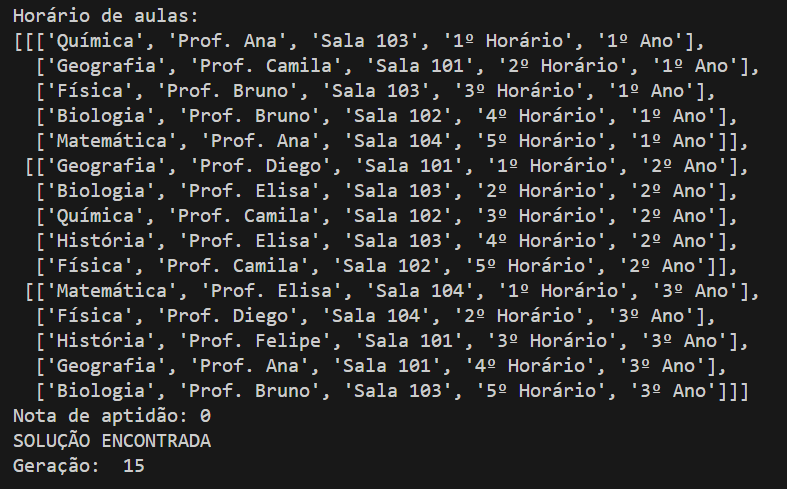

## Analise das Notas de Aptidão
A forma como foram realizadas as notas de aptidão pode ser vista no gráfico da Figura 1 e na Tabela 3. Inicialmente, as notas de aptidão começam negativas e, ao longo do tempo, evoluem até chegar a 0, que seria o momento exato onde a solução foi encontrada. É perceptível que a evolução das notas de aptidão segue quase linearmente a cada geração. No início, a aptidão é muito ruim, evoluindo significativamente na segunda geração, e finalmente, apresentando uma evolução quase linear para o restante das gerações.

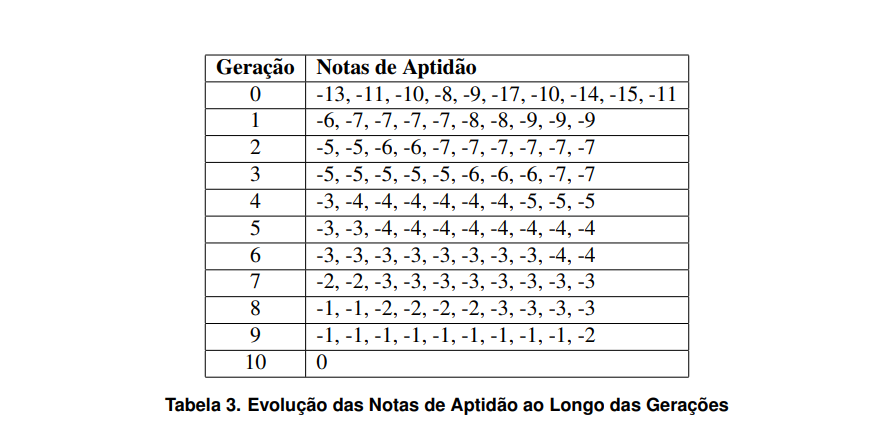

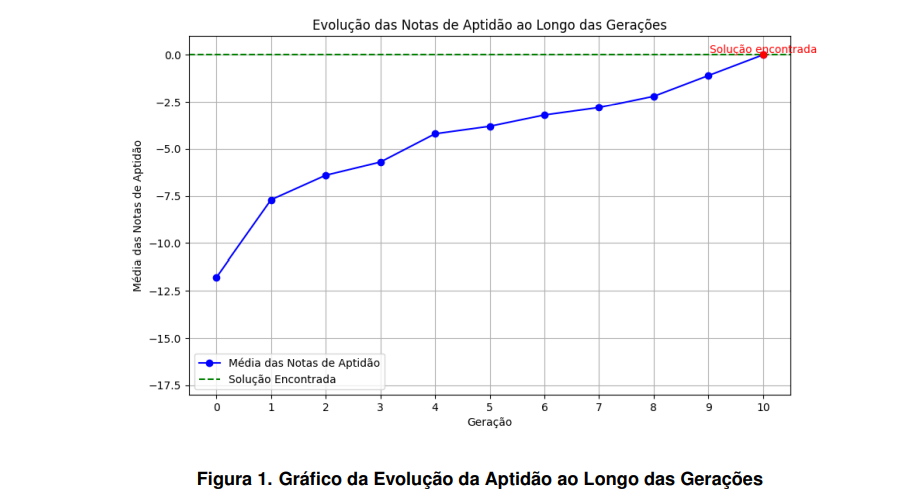

## Dispersão do valor total de gerações para se encontrar um resultado

O experimento envolveu o uso de um algoritmo genético para criar horários escolares. Para explorar melhor o espaço de soluções, foi utilizada a dispersão do valor total de gerações. O algoritmo foi executado 1000 vezes para obter dados robustos para análise.

Os dados coletados incluem o número de gerações necessárias para encontrar uma solução e uma medida associada à qualidade dessa solução baseada na função de fitness. A variação no número de gerações indica a complexidade do problema, com múltiplos mínimos locais. 

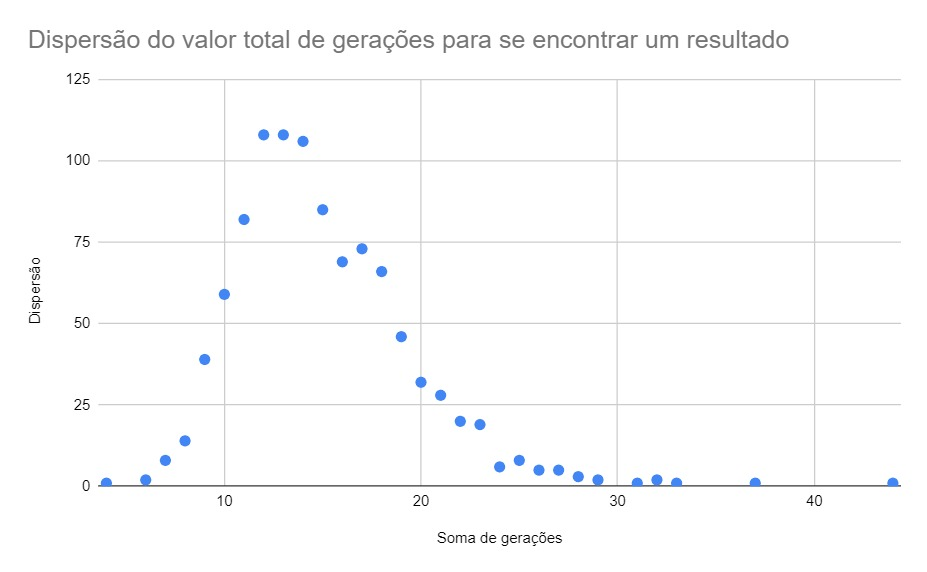

# Código

## Configurações e Parâmetros

In [46]:
import random
import itertools
from scipy import special as sc
import pprint

# Constantes e parâmetros do experimento
NUM_CLASSES = 3  # Número de turmas (1º Ano, 2º Ano, 3º Ano)
NUM_PERIODS = 5  # Número de horários por dia (1º Horário, 2º Horário, 3º Horário, 4º Horário)
POPULATION_SIZE = 10  # Tamanho da população de soluções
MIXING_NUMBER = 2  # Número de pais usados para cruzamento
MUTATION_RATE = 0.05  # Taxa de mutação

# Listas de disciplinas, professores e salas
subjects = ["Matemática", "História", "Geografia", "Química", "Física", "Biologia"]
teachers = ["Prof. Ana", "Prof. Bruno", "Prof. Camila", "Prof. Diego", "Prof. Elisa", "Prof. Felipe"]
rooms = ["Sala 101", "Sala 102", "Sala 103", "Sala 104"]

## Função de pontuação de aptidão - Quão boa é uma solução?

In [49]:
# Função de pontuação de aptidão - Quão boa é uma solução?
def fitness_score(schedule):
    conflicts = 0  # Inicializa o contador de conflitos com zero

    # Loop para verificar conflitos dentro de cada turma
    for class_index in range(NUM_CLASSES):
        seen_subjects = set()  # Conjunto para armazenar disciplinas já vistas na turma atual

        # Loop para verificar cada período na turma atual
        for period in range(NUM_PERIODS):
            subject = schedule[class_index][period][0]  # Obtém a disciplina do período atual

            # Verifica se a disciplina já foi vista na turma atual
            if subject in seen_subjects:
                conflicts += 1  # Incrementa o contador de conflitos se a disciplina aparecer mais de uma vez na mesma turma
            seen_subjects.add(subject)  # Adiciona a disciplina ao conjunto de disciplinas já vistas

    # Loop para verificar conflitos entre turmas no mesmo período
    for period in range(NUM_PERIODS):
        seen_teachers = set()  # Conjunto para armazenar professores já vistos no período atual
        seen_rooms = set()  # Conjunto para armazenar salas já vistas no período atual
        seen_subjects = set()  # Conjunto para armazenar disciplinas já vistas no período atual

        # Loop para verificar cada turma no período atual
        for class_index in range(NUM_CLASSES):
            subject = schedule[class_index][period][0]  # Obtém a disciplina do período atual
            teacher = schedule[class_index][period][1]  # Obtém o professor do período atual
            room = schedule[class_index][period][2]  # Obtém a sala do período atual

            # Verifica se a disciplina já foi vista no período atual em diferentes turmas
            if subject in seen_subjects:
                conflicts += 1  # Incrementa o contador de conflitos se a disciplina estiver sendo ensinada ao mesmo tempo em diferentes turmas
            # Verifica se o professor já foi visto no período atual
            if teacher in seen_teachers:
                conflicts += 1  # Incrementa o contador de conflitos se o mesmo professor estiver dando mais de uma aula ao mesmo tempo
            # Verifica se a sala já foi vista no período atual
            if room in seen_rooms:
                conflicts += 1  # Incrementa o contador de conflitos se a mesma sala estiver sendo usada para mais de uma aula ao mesmo tempo

            seen_subjects.add(subject)  # Adiciona a disciplina ao conjunto de disciplinas já vistas
            seen_teachers.add(teacher)  # Adiciona o professor ao conjunto de professores já vistos
            seen_rooms.add(room)  # Adiciona a sala ao conjunto de salas já vistas

    return -conflicts  # Retorna o negativo do número de conflitos (queremos minimizar os conflitos)


## Função de seleção de pais com base na pontuação de aptidão

In [52]:
# Função de seleção de pais com base na pontuação de aptidão
def selection(population):
    # Inicializa uma lista vazia para armazenar os pais selecionados
    parents = []
    
    # Encontra a menor pontuação de aptidão na população
    min_score = min(fitness_score(ind) for ind in population)
    
    # Normaliza as pontuações de aptidão para serem positivas
    normalized_scores = [(fitness_score(ind) - min_score + 1) for ind in population]
    
    # Para cada indivíduo na população e sua pontuação normalizada
    for ind, norm_score in zip(population, normalized_scores):
        # Se um número aleatório dentro da faixa de pontuações normalizadas for menor que a pontuação normalizada do indivíduo
        if random.randrange(0, max(normalized_scores)) < norm_score:
            # Adiciona o indivíduo à lista de pais selecionados
            parents.append(ind)
    
    # Retorna a lista de pais selecionados
    return parents

## Função de crossover - Combina características de cada solução usando um ponto de cruzamento

In [55]:
# Função de crossover - Combina características de cada solução usando um ponto de cruzamento
def crossover(parents):
    # Seleciona pontos de cruzamento aleatórios
    cross_points = random.sample(range(NUM_PERIODS), MIXING_NUMBER - 1)
    # Inicializa uma lista vazia para armazenar os descendentes
    offsprings = []
    # Gera todas as permutações possíveis dos pais, considerando o número de pais usados para cruzamento
    permutations = list(itertools.permutations(parents, MIXING_NUMBER))

    # Para cada permutação de pais
    for perm in permutations:
        # Inicializa um novo descendente vazio
        offspring = []
        # Ponto de início para o cruzamento
        start_pt = 0
        # Para cada índice de pai e ponto de cruzamento
        for parent_idx, cross_point in enumerate(cross_points):
            # Para cada classe (turma)
            for class_index in range(NUM_CLASSES):
                # Seleciona a parte do cronograma do pai atual até o ponto de cruzamento
                parent_part = perm[parent_idx][class_index][start_pt:cross_point]
                # Se o descendente não tem a classe atual, adiciona a parte do pai
                if len(offspring) <= class_index:
                    offspring.append(parent_part)
                else:
                    # Caso contrário, estende a classe atual com a parte do pai
                    offspring[class_index].extend(parent_part)
            # Atualiza o ponto de início para o próximo cruzamento
            start_pt = cross_point

        # Para cada classe (turma)
        for class_index in range(NUM_CLASSES):
            # Seleciona a parte final do último pai desde o ponto de cruzamento até o final
            last_parent = perm[-1][class_index]
            parent_part = last_parent[start_pt:]
            # Adiciona essa parte ao descendente
            offspring[class_index].extend(parent_part)

        # Adiciona o descendente gerado à lista de descendentes
        offsprings.append(offspring)

    # Retorna a lista de descendentes
    return offsprings

## Função de mutação - Cria diversidade na população

In [58]:
# Função de mutação - Cria diversidade na população
def mutate(schedule):
    # Itera sobre cada turma (classe) no cronograma
    for class_index in range(NUM_CLASSES):
        # Itera sobre cada período (horário) no cronograma da turma
        for period in range(NUM_PERIODS):
            # Gera um número aleatório entre 0 e 1 e compara com a taxa de mutação
            if random.random() < MUTATION_RATE:
                time = schedule[class_index][period][3]
                year = schedule[class_index][period][4]
                # Se o número aleatório for menor que a taxa de mutação, realiza a mutação
                schedule[class_index][period] = [
                    random.choice(subjects),  # Escolhe aleatoriamente uma matéria
                    random.choice(teachers),  # Escolhe aleatoriamente um professor
                    random.choice(rooms),      # Escolhe aleatoriamente uma sala
                    time,                     # Mantém o horário atual
                    year                      # Mantém a turma atual
                ]
    # Retorna o cronograma possivelmente modificado
    return schedule

## Imprime a solução encontrada


In [61]:
# Imprime a solução encontrada
def print_found_goal(population, to_print=True):
    # Itera sobre cada indivíduo na população
    for ind in population:
        # Calcula a pontuação de aptidão do indivíduo
        score = fitness_score(ind)
        
        # Se a impressão estiver habilitada, imprime o cronograma e a pontuação
        if to_print:
            #comente para ter somente a nota de aptidão
            print('\nHorário de aulas: ')
            #comente para ter somente a nota de aptidão
            pprint.pprint(ind)
            print(f'Nota de aptidão: {score}')
        
        # Verifica se a pontuação do indivíduo é 0 (sem conflitos)
        if score == 0:
            # Se a impressão estiver habilitada, imprime que a solução foi encontrada
            if to_print:
                print('SOLUÇÃO ENCONTRADA')
                print('Geração: ', generation, '\n')
            # Retorna True indicando que uma solução sem conflitos foi encontrada
            return True
    
    # Se a impressão estiver habilitada, imprime que a solução não foi encontrada
    if to_print:
        print('Solução não encontrada')
    # Retorna False indicando que nenhuma solução sem conflitos foi encontrada
    return False

## Função para implementar a evolução


In [64]:
# Função para implementar a evolução
def evolution(population):
    # Seleciona os pais a partir da população atual com base na pontuação de aptidão
    parents = selection(population)
    
    # Realiza o crossover entre os pais selecionados para gerar descendentes (offsprings)
    offsprings = crossover(parents)
    
    # Aplica mutações aos descendentes
    offsprings = list(map(mutate, offsprings))

    # Combina os descendentes com a população atual
    new_gen = offsprings + population
    
    # Ordena a nova geração com base na pontuação de aptidão em ordem decrescente
    # Mantém apenas os melhores indivíduos até o tamanho máximo da população
    new_gen = sorted(new_gen, key=lambda ind: fitness_score(ind), reverse=True)[:POPULATION_SIZE]

    # Retorna a nova geração
    return new_gen

## Gera a população inicial

In [67]:
# Gera a população inicial (soluções)
def generate_population():
    # Cria uma lista vazia para armazenar a população inicial
    population = []
    
    # Loop para criar um número definido de soluções (indivíduos) na população
    for _ in range(POPULATION_SIZE):
        # Cria uma nova solução (um cronograma de aulas)
        schedule = []
        
        # Loop para criar um número definido de classes (turmas) no cronograma
        for i in range(NUM_CLASSES):
            # Cria uma lista vazia para armazenar os períodos de aula para a classe atual
            class_schedule = []
            
            # Loop para criar um número definido de períodos (horários) para a classe
            for j in range(NUM_PERIODS):
                # Adiciona um período de aula à lista, escolhendo aleatoriamente um assunto, um professor e uma sala
                class_schedule.append([
                    random.choice(subjects),   # Escolhe aleatoriamente um assunto da lista 'matérias'
                    random.choice(teachers),   # Escolhe aleatoriamente um professor da lista 'professores'
                    random.choice(rooms),       # Escolhe aleatoriamente uma sala da lista 'salas'
                    str(j+1) + 'º Horário',     # Adiciona o horário atual ao período de aula
                    str(i+1) + 'º Ano'          # Adiciona a turma atual ao período de aula
                ])
            # Adiciona o cronograma da classe ao cronograma geral
            #class_schedule.append('turma '+str(i+1))
            schedule.append(class_schedule)
        
        # Adiciona a solução (cronograma de aulas) à população
        population.append(schedule)
    
    # Retorna a população gerada
    return population

## Executa o código

In [72]:
# Executa o experimento
generation = 0
population = generate_population()

# Loop até encontrar a solução
while not print_found_goal(population):
    # Imprime a geração atual
    print(f'Generation: {generation}\n\n')
    #print sem quebra de linha
    
    # Verifica e imprime a pontuação de aptidão da população atual
    #print_found_goal(population)
    
    # Evolui a população para a próxima geração
    population = evolution(population)
    
    # Incrementa o contador de gerações
    generation += 1



Horário de aulas: 
[[['História', 'Prof. Bruno', 'Sala 102', '1º Horário', '1º Ano'],
  ['Geografia', 'Prof. Felipe', 'Sala 104', '2º Horário', '1º Ano'],
  ['Química', 'Prof. Diego', 'Sala 103', '3º Horário', '1º Ano'],
  ['Química', 'Prof. Elisa', 'Sala 103', '4º Horário', '1º Ano'],
  ['Química', 'Prof. Camila', 'Sala 103', '5º Horário', '1º Ano']],
 [['História', 'Prof. Bruno', 'Sala 101', '1º Horário', '2º Ano'],
  ['História', 'Prof. Felipe', 'Sala 101', '2º Horário', '2º Ano'],
  ['Química', 'Prof. Camila', 'Sala 104', '3º Horário', '2º Ano'],
  ['História', 'Prof. Ana', 'Sala 103', '4º Horário', '2º Ano'],
  ['Matemática', 'Prof. Bruno', 'Sala 103', '5º Horário', '2º Ano']],
 [['Geografia', 'Prof. Felipe', 'Sala 102', '1º Horário', '3º Ano'],
  ['Física', 'Prof. Camila', 'Sala 102', '2º Horário', '3º Ano'],
  ['Química', 'Prof. Bruno', 'Sala 102', '3º Horário', '3º Ano'],
  ['Química', 'Prof. Camila', 'Sala 101', '4º Horário', '3º Ano'],
  ['História', 'Prof. Camila', 'Sala 10

## Conclusão
Em resumo, os testes realizados demonstraram que a solução implementada atendeu aos requisitos estabelecidos como conflito de salas e horários, gerando uma solução que pode ser utilizada na prática. Ao fazer uma análise mais minuciosa da solução encontrada é perceptível que alguns pontos podem ser implementados num trabalho futuro para que os horários atendam melhor todos os envolvidos e não sobrecarregue uma pessoa só. Outro ponto que pode ser melhorado seria também a questão das salas serem compartilhadas.

## Referências

NumPy Documentation
NUMPY. NumPy Documentation. Disponível em: https://numpy.org/. Acesso em: 31 jul. 2024.

Python Random Library Documentation
PYTHON. Python Random Library Documentation. Disponível em: https://docs.python.org/3/library/random.html. Acesso em: 31 jul. 2024.

Matplotlib Documentation
MATPLOTLIB. Matplotlib Documentation. Disponível em: https://matplotlib.org/. Acesso em: 31 jul. 2024.

Utilização de algoritmos genéticos para montagem de horários acadêmicos com foco na blocagem de horários
BARBOSA, Edson. Utilização de algoritmos genéticos para montagem de horários acadêmicos com foco na blocagem de horários. Disponível em: https://repositorio.ufrn.br/handle/123456789/42861. Acesso em: 31 jul. 2024.

Introdução ao Algoritmo Genético
SADAO, Hiroshi. Introdução ao Algoritmo Genético. Disponível em: https://www.dm.ufscar.br/~sadao/download/?file=article/algoritmos-geneticos.pdf. Acesso em: 31 jul. 2024.